<a href="https://colab.research.google.com/github/Gabrielaqf16/DS-challenge-Telecom-X/blob/main/Telecom_X_Latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Vinculamos la data
df = pd.read_json('/content/TelecomX_Data.json')

## Conoce el conjunto de datos

In [6]:
#Extraemos los 5 primeros registros de la data
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [7]:
#Extraemos los 5 últimos registros de la data
df.tail()

,customerID,Churn,customer,phone,internet,account
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7266,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

## Normalizar las columnas

In [9]:
# Extracción de datos anidados en columnas con diccionarios
#Normalizar columnas con estructuras JSON/diccionarios para obtener DataFrames planos

df_customer = pd.json_normalize(df['customer'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])
df_phone = pd.json_normalize(df['phone'])

#Combina el DataFrame original df con los nuevos DataFrames generados, uniéndolos por columnas (axis=1)
df = pd.concat([df, df_customer, df_internet, df_account, df_phone], axis=1)

In [12]:
#Información de la DataFrame generada a partir de las nuevas columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   customer          7267 non-null   object 
 3   phone             7267 non-null   object 
 4   internet          7267 non-null   object 
 5   account           7267 non-null   object 
 6   gender            7267 non-null   object 
 7   SeniorCitizen     7267 non-null   int64  
 8   Partner           7267 non-null   object 
 9   Dependents        7267 non-null   object 
 10  tenure            7267 non-null   int64  
 11  InternetService   7267 non-null   object 
 12  OnlineSecurity    7267 non-null   object 
 13  OnlineBackup      7267 non-null   object 
 14  DeviceProtection  7267 non-null   object 
 15  TechSupport       7267 non-null   object 
 16  StreamingTV       7267 non-null   object 


In [13]:
#Se eliminan columnas que ya se expandieron y no se necesita para el análisis
datos_normalizados = df.drop(['customer', 'internet', 'account', 'phone'], axis=1)

In [27]:
#Se guarda el nuevo Dataset en una datos_normalizados
datos_normalizados.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PhoneService,MultipleLines
7205,9912-OMZDS,No,Female,0,Yes,Yes,59,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Electronic check,106.15,6256.2,Yes,Yes
3607,4973-MGTON,No,Female,0,Yes,No,71,DSL,Yes,Yes,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),84.40,5969.3,Yes,No
1721,2450-ZKEED,No,Female,0,No,No,11,DSL,No,No,...,Yes,No,No,One year,No,Bank transfer (automatic),53.80,651.55,Yes,No
6857,9467-ROOLM,No,Female,0,No,No,25,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.05,461.3,Yes,No
1635,2322-VCZHZ,No,Male,1,Yes,No,23,Fiber optic,Yes,Yes,...,No,No,Yes,Month-to-month,Yes,Electronic check,90.00,2024.1,Yes,No


##Explorar las columnas del nuevo dataset y mostrar tipos

In [15]:
# Mostrando el nuevo número de columnas con su información

datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   InternetService   7267 non-null   object 
 8   OnlineSecurity    7267 non-null   object 
 9   OnlineBackup      7267 non-null   object 
 10  DeviceProtection  7267 non-null   object 
 11  TechSupport       7267 non-null   object 
 12  StreamingTV       7267 non-null   object 
 13  StreamingMovies   7267 non-null   object 
 14  Contract          7267 non-null   object 
 15  PaperlessBilling  7267 non-null   object 
 16  PaymentMethod     7267 non-null   object 


##Comprobación de incoherencias en los datos

In [31]:
# Verificar y encontrar Valores duplicados

datos_normalizados.duplicated().sum()

np.int64(0)

In [35]:
# Verificar y encontrar datos nulos

datos_normalizados.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [34]:
# Verificar y encontrar valores ausentes

datos_normalizados.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [36]:
#Selecciona dentro de una de las columnas si tiene filas con valores ausentes
valores_ausentes = datos_normalizados['Charges.Total'].isna()
datos_normalizados[valores_ausentes]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PhoneService,MultipleLines


In [37]:
datos_normalizados = datos_normalizados.dropna(subset=['Charges.Total'])

In [38]:
datos_normalizados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PhoneService,MultipleLines
0,0002-ORFBO,No,Female,0,Yes,Yes,9,DSL,No,Yes,...,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,Yes,No
1,0003-MKNFE,No,Male,0,No,No,9,DSL,No,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,Yes,Yes
2,0004-TLHLJ,Yes,Male,0,No,No,4,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,Yes,No
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,Yes,No
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Fiber optic,No,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,DSL,Yes,No,...,Yes,No,No,One year,No,Mailed check,55.15,742.9,Yes,No
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Fiber optic,No,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,Yes,Yes
7264,9992-UJOEL,No,Male,0,No,No,2,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,Yes,No
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,DSL,Yes,No,...,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,Yes,No


## Manejo de inconsistencias

In [39]:
# Limpiar y convertir la columna 'Charges.Total' a formato float

datos_normalizados['Charges.Total'] = datos_normalizados['Charges.Total'].str.replace(' ','').replace('$', '').replace(',', '').replace('', None).astype(float)

In [40]:
datos_normalizados['Charges.Total'].dtype

dtype('float64')

In [41]:
datos_normalizados['customerID'].isnull().sum()

np.int64(0)

In [42]:
datos_normalizados['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [44]:
datos_normalizados = datos_normalizados[datos_normalizados['Churn'] != '']

In [45]:
datos_normalizados['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [46]:
datos_normalizados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PhoneService,MultipleLines
0,0002-ORFBO,No,Female,0,Yes,Yes,9,DSL,No,Yes,...,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,Yes,No
1,0003-MKNFE,No,Male,0,No,No,9,DSL,No,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,Yes,Yes
2,0004-TLHLJ,Yes,Male,0,No,No,4,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,Yes,No
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,Yes,No
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Fiber optic,No,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,DSL,Yes,No,...,Yes,No,No,One year,No,Mailed check,55.15,742.90,Yes,No
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Fiber optic,No,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,Yes,Yes
7264,9992-UJOEL,No,Male,0,No,No,2,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,Yes,No
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,DSL,Yes,No,...,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,Yes,No


In [51]:
datos_normalizados['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [50]:
datos_normalizados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PhoneService,MultipleLines
0,0002-ORFBO,No,Female,0,Yes,Yes,9,DSL,No,Yes,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,Yes,No
1,0003-MKNFE,No,Male,0,No,No,9,DSL,No,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,Yes,Yes
2,0004-TLHLJ,Yes,Male,0,No,No,4,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes,No
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes,No
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Fiber optic,No,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,Yes,No


In [49]:
datos_normalizados['Charges.Monthly'].unique()

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

In [56]:
datos_normalizados['TechSupport'].isnull().sum()

np.int64(0)

## Columna de cuentas diarias (Charges.Daily)

In [57]:
datos_normalizados['Charges.Daily'] = datos_normalizados['Charges.Monthly'] / 30

/tmp/ipython-input-2230139526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_normalizados['Charges.Daily'] = datos_normalizados['Charges.Monthly'] / 30


In [53]:
#Verificación de inserción de columna (Charges.Daily)

datos_normalizados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PhoneService,MultipleLines,Charges.Daily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,DSL,No,Yes,...,Yes,No,One year,Yes,Mailed check,65.6,593.30,Yes,No,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,DSL,No,No,...,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,Yes,Yes,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes,No,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Fiber optic,No,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes,No,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Fiber optic,No,No,...,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,Yes,No,2.796667


In [54]:
#ver columnas
datos_normalizados.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'PhoneService', 'MultipleLines',
       'Charges.Daily'],
      dtype='object')

## Estandarización y transformación de datos (opcional)

In [61]:
# Convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0)

variables_binarias = [
                     'Churn', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup',
                     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                     'PaperlessBilling', 'PhoneService', 'MultipleLines'
]

# Reemplazar los valores textuales por binarios

datos_normalizados[variables_binarias] = datos_normalizados[variables_binarias].replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-1080376236.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_normalizados[variables_binarias] = datos_normalizados[variables_binarias].replace({'Yes': 1, 'No': 0})


In [62]:
#verificar si hay datos variables en las respectivas columnas
datos_normalizados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PhoneService,MultipleLines,Charges.Daily
0,0002-ORFBO,0,Female,0,1,1,9,DSL,0,1,...,1,0,One year,1,Mailed check,65.6,593.30,1,0,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,DSL,0,0,...,0,1,Month-to-month,0,Mailed check,59.9,542.40,1,1,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,Fiber optic,0,0,...,0,0,Month-to-month,1,Electronic check,73.9,280.85,1,0,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,Fiber optic,0,1,...,1,1,Month-to-month,1,Electronic check,98.0,1237.85,1,0,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,Fiber optic,0,0,...,1,0,Month-to-month,1,Mailed check,83.9,267.40,1,0,2.796667


In [63]:
# Inspeccionar todas las columnas disponibles en el DataFrame
# Esto permitirá identificar cuáles necesitan cambios de nombre

columnas = []
columnas = datos_normalizados.columns
columnas

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'PhoneService', 'MultipleLines',
       'Charges.Daily'],
      dtype='object')

## Diccionario de datos: Significado de cada variable
# ***Nos ayudará a renombrar en español***


* customerID: número de identificación único de cada cliente
* Churn: si el cliente dejó o no la empresa
* gender: género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
* tenure: meses de contrato del cliente
* PhoneService: suscripción al servicio telefónico
* MultipleLines: suscripción a más de una línea telefónica
* InternetService: suscripción a un proveedor de internet
* OnlineSecurity: suscripción adicional de seguridad en línea
* OnlineBackup: suscripción adicional de respaldo en línea
* DeviceProtection: suscripción adicional de protección del dispositivo
* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
* StreamingTV: suscripción de televisión por cable
* StreamingMovies: suscripción de streaming de películas
* Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en línea
* PaymentMethod: forma de pago
* Charges.Monthly: total de todos los servicios del cliente por mes
* Charges.Total: total gastado por el cliente


In [65]:
# Diccionario con los nombres en español, en minúsculas y separados con guión bajo

columnas_es = {
    'customerID': 'id_cliente',
    'Churn': 'churn',
    'gender': 'genero',
    'SeniorCitizen': 'adulto_mayor',
    'Partner': 'pareja',
    'Dependents': 'dependientes',
    'tenure': 'meses_contrato',
    'InternetService': 'servicio_internet',
    'OnlineSecurity': 'seguridad_en_linea',
    'OnlineBackup': 'respaldo_en_linea',
    'DeviceProtection': 'proteccion_dispositivo',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'tv_streaming',
    'StreamingMovies': 'peliculas_streaming',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'factura_electronica',
    'PaymentMethod': 'metodo_pago',
    'Charges.Monthly': 'cargo_mensual',
    'Charges.Total': 'cargo_total',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'multiples_lineas',
    'Charges.Daily': 'cargo_diario'
}

# Renombrar columnas en el DataFrame
datos_normalizados = datos_normalizados.rename(columns=columnas_es)

# Verificación de cambios hechos

datos_normalizados.head()

,id_cliente,churn,genero,adulto_mayor,pareja,dependientes,meses_contrato,servicio_internet,seguridad_en_linea,respaldo_en_linea,...,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total,servicio_telefonico,multiples_lineas,cargo_diario
0,0002-ORFBO,0,Female,0,1,1,9,DSL,0,1,...,1,0,One year,1,Mailed check,65.6,593.30,1,0,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,DSL,0,0,...,0,1,Month-to-month,0,Mailed check,59.9,542.40,1,1,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,Fiber optic,0,0,...,0,0,Month-to-month,1,Electronic check,73.9,280.85,1,0,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,Fiber optic,0,1,...,1,1,Month-to-month,1,Electronic check,98.0,1237.85,1,0,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,Fiber optic,0,0,...,1,0,Month-to-month,1,Mailed check,83.9,267.40,1,0,2.796667


In [66]:
datos_normalizados['metodo_pago'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [67]:
# Cambiar el contenido de las columnas con valores object para traducirlas al español

datos_normalizados['genero'] = datos_normalizados['genero'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
datos_normalizados['servicio_internet'] = datos_normalizados['servicio_internet'].replace({'Fiber optic': 'Fibra Óptica', 'DSL': 'DSL', 'No': 'No'})
datos_normalizados['tipo_contrato'] = datos_normalizados['tipo_contrato'].replace({'Month-to-month': 'Mensual', 'One year': 'Anual', 'Two year': 'Doble Anual'})
datos_normalizados['metodo_pago'] = datos_normalizados['metodo_pago'].replace({'Electronic check': 'Cheque Electrónico', 'Mailed check': 'Cheque Postal', 'Bank transfer (automatic)': 'Transferencia Bancaria Automática', 'Credit card (automatic)': 'Tarjeta de Crédito Automática'})

In [72]:
# Verificar que cambios

datos_normalizados

,id_cliente,churn,genero,adulto_mayor,pareja,dependientes,meses_contrato,servicio_internet,seguridad_en_linea,respaldo_en_linea,...,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total,servicio_telefonico,multiples_lineas,cargo_diario
0,0002-ORFBO,0,Femenino,0,1,1,9,DSL,0,1,...,1,0,Anual,1,Cheque Postal,65.60,593.30,1,0,2.186667
1,0003-MKNFE,0,Masculino,0,0,0,9,DSL,0,0,...,0,1,Mensual,0,Cheque Postal,59.90,542.40,1,1,1.996667
2,0004-TLHLJ,1,Masculino,0,0,0,4,Fibra Óptica,0,0,...,0,0,Mensual,1,Cheque Electrónico,73.90,280.85,1,0,2.463333
3,0011-IGKFF,1,Masculino,1,1,0,13,Fibra Óptica,0,1,...,1,1,Mensual,1,Cheque Electrónico,98.00,1237.85,1,0,3.266667
4,0013-EXCHZ,1,Femenino,1,1,0,3,Fibra Óptica,0,0,...,1,0,Mensual,1,Cheque Postal,83.90,267.40,1,0,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Femenino,0,0,0,13,DSL,1,0,...,0,0,Anual,0,Cheque Postal,55.15,742.90,1,0,1.838333
7263,9992-RRAMN,1,Masculino,0,1,0,22,Fibra Óptica,0,0,...,0,1,Mensual,1,Cheque Electrónico,85.10,1873.70,1,1,2.836667
7264,9992-UJOEL,0,Masculino,0,0,0,2,DSL,0,1,...,0,0,Mensual,1,Cheque Postal,50.30,92.75,1,0,1.676667
7265,9993-LHIEB,0,Masculino,0,1,1,67,DSL,1,0,...,0,1,Doble Anual,0,Cheque Postal,67.85,4627.65,1,0,2.261667


# 📊 Carga y análisis

##Análisis Descriptivo

In [73]:
datos_normalizados.describe()

,churn,adulto_mayor,pareja,dependientes,meses_contrato,factura_electronica,cargo_mensual,cargo_total,servicio_telefonico,cargo_diario
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.592219,64.761692,2283.300441,0.903166,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.491457,30.090047,2266.771362,0.295752,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,35.500000,401.450000,1.000000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.350000,1397.475000,1.000000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.850000,3794.737500,1.000000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,1.000000,3.958333


## Distribución de evasión

/tmp/ipython-input-2976714364.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.countplot(x='churn', data=datos_normalizados, palette=['#80CBC4', '#FFAB91'])


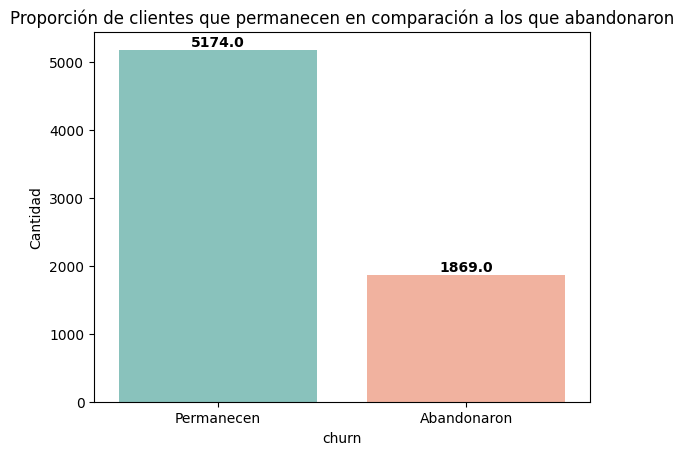

In [76]:
# Visualización de la proporción de clientes según la columna Churn

ax =sns.countplot(x='churn', data=datos_normalizados, palette=['#80CBC4', '#FFAB91'])
plt.title('Proporción de clientes que permanecen en comparación a los que abandonaron')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['Permanecen', 'Abandonaron'])

for p in ax.patches:
    altura = p.get_height()
    ax.annotate(f'{altura}',
                (p.get_x() + p.get_width() / 2., altura),
                ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()

## Recuento de evasión por variables categóricas

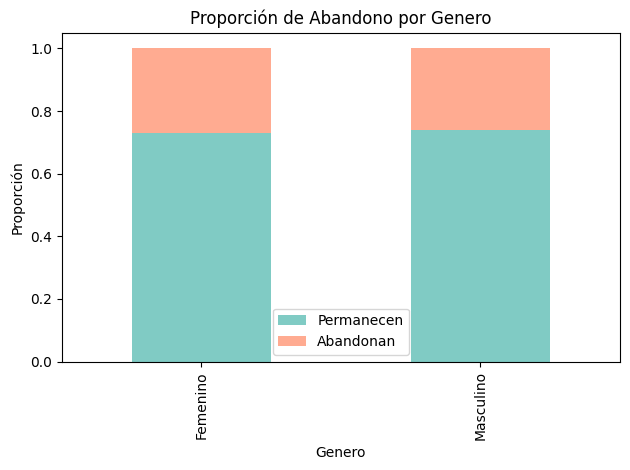

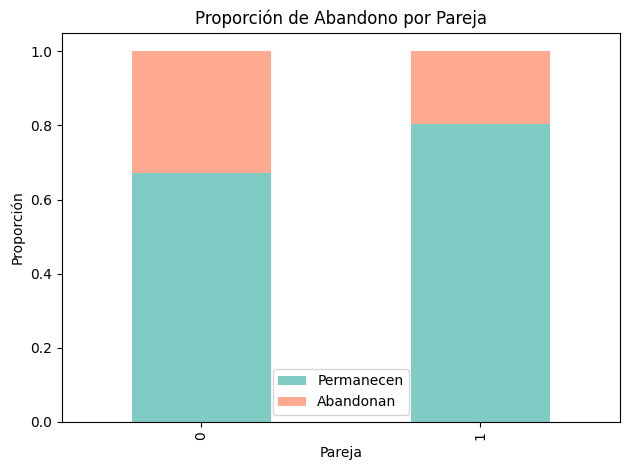

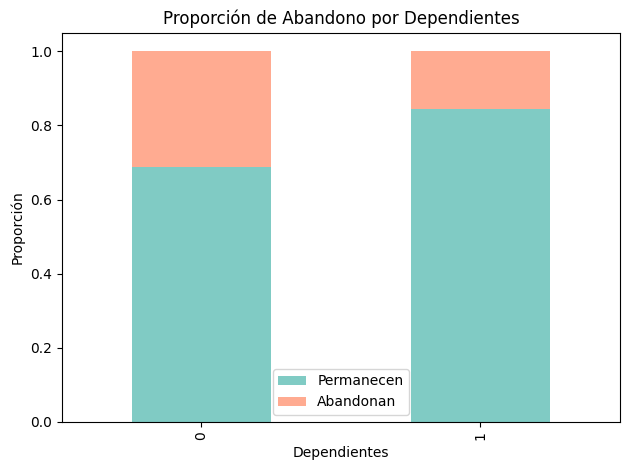

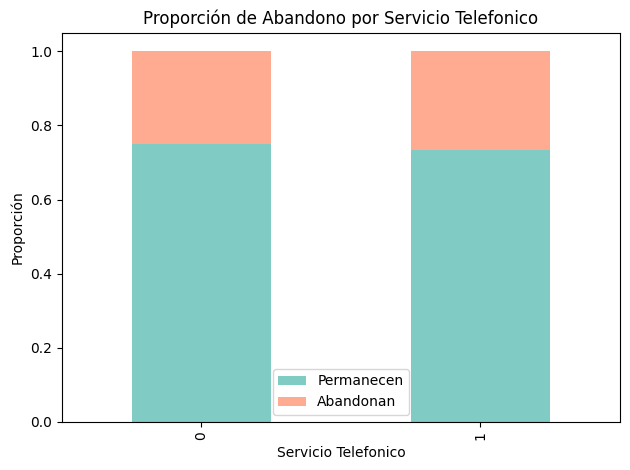

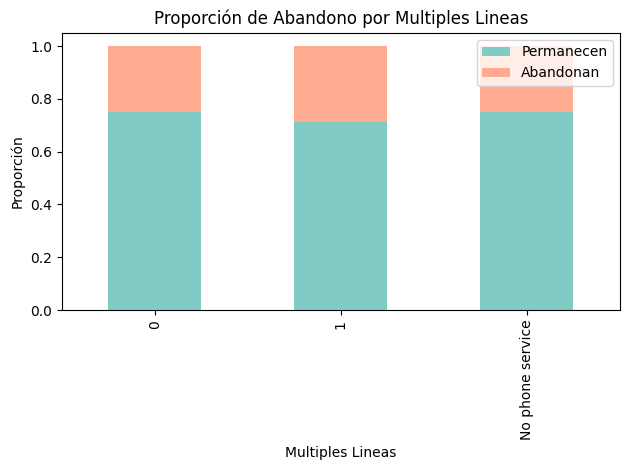

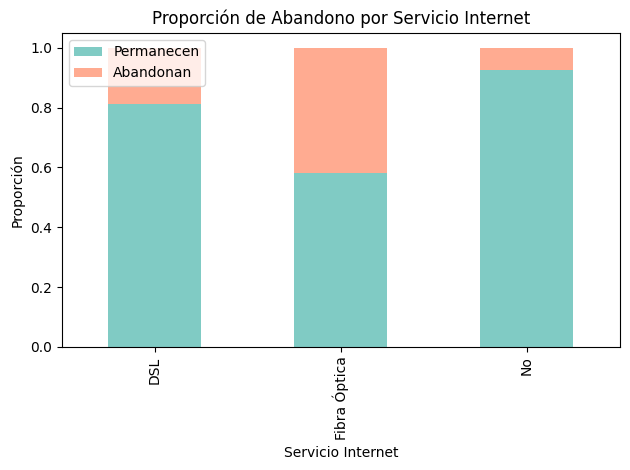

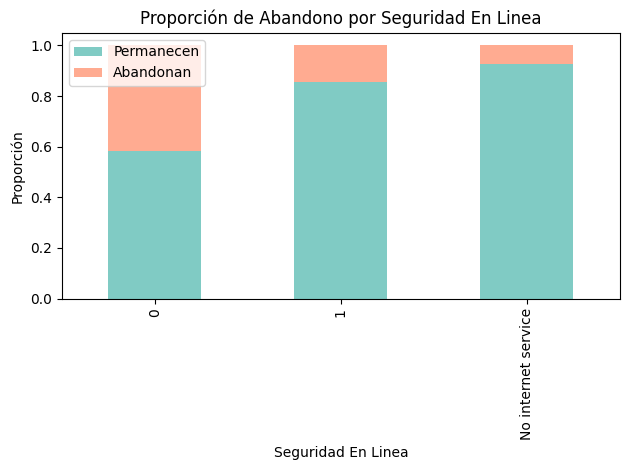

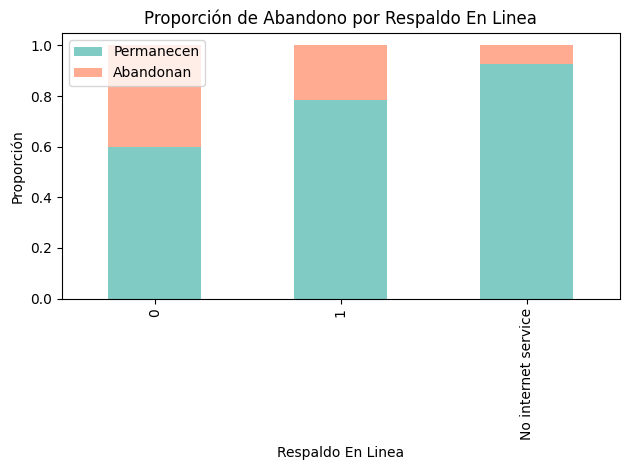

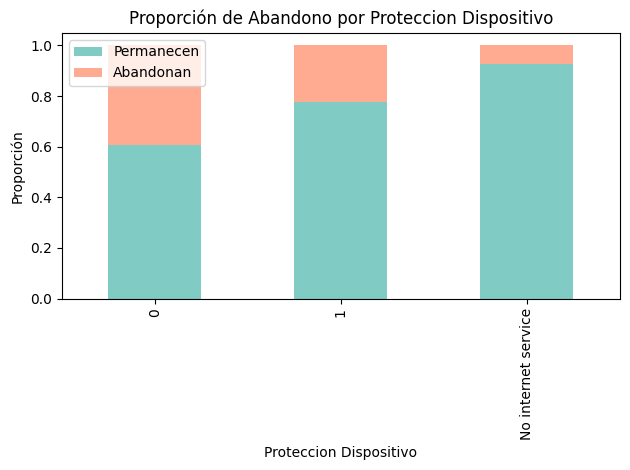

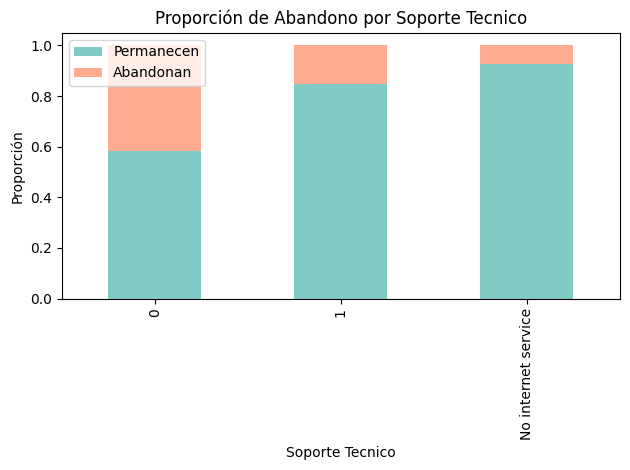

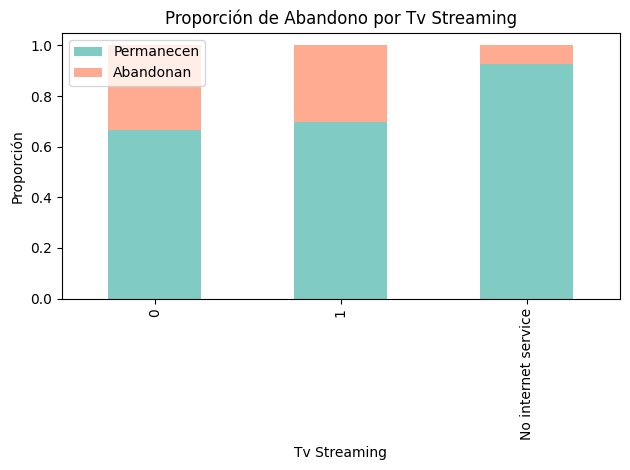

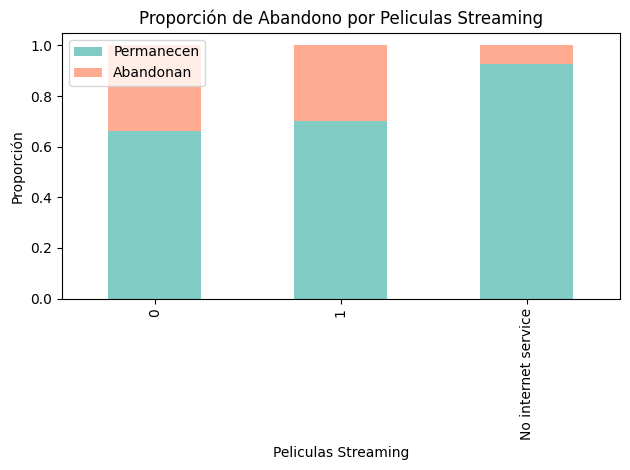

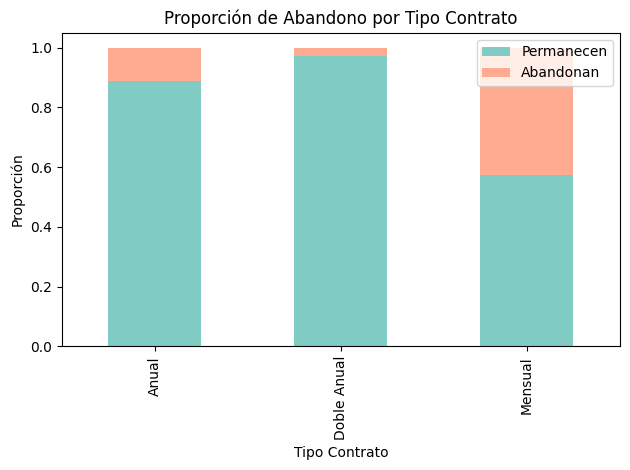

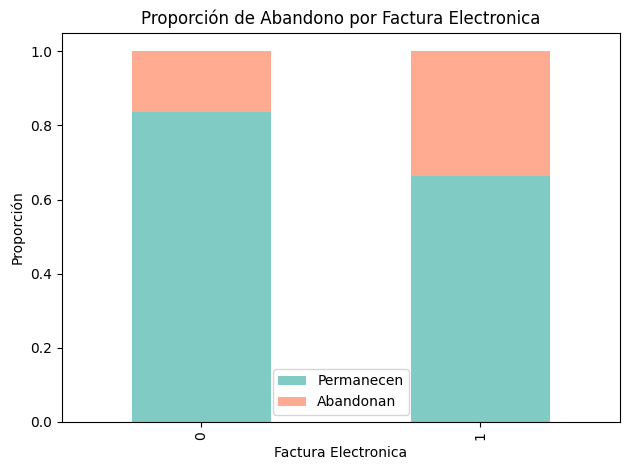

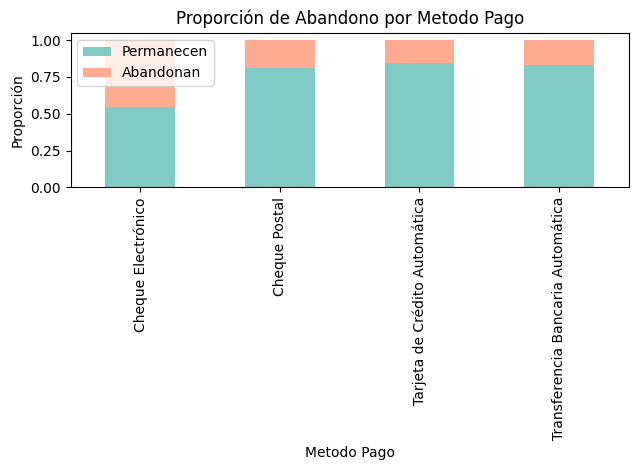

In [79]:
#Anotar las variables categóricas

variables_categoricas = [
    'genero', 'pareja', 'dependientes', 'servicio_telefonico',
    'multiples_lineas', 'servicio_internet', 'seguridad_en_linea',
    'respaldo_en_linea', 'proteccion_dispositivo', 'soporte_tecnico',
    'tv_streaming', 'peliculas_streaming', 'tipo_contrato',
    'factura_electronica', 'metodo_pago'
]

for col in variables_categoricas:
    datos_normalizados.groupby(col)['churn'].value_counts(normalize=True).unstack().plot(
        kind='bar', stacked=True, color=['#80CBC4', '#FFAB91']
    )
    plt.title(f'Proporción de Abandono por {col.replace("_", " ").title()}')
    plt.ylabel('Proporción')
    plt.xlabel(col.replace("_", " ").title())
    plt.legend(['Permanecen', 'Abandonan'])
    plt.tight_layout()
    plt.show()

## Conteo de evasión de variables numéricas

/tmp/ipython-input-4261260096.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='churn', y=col, data=datos_normalizados, palette={'0':'#80CBC4', '1':'#FFAB91'})


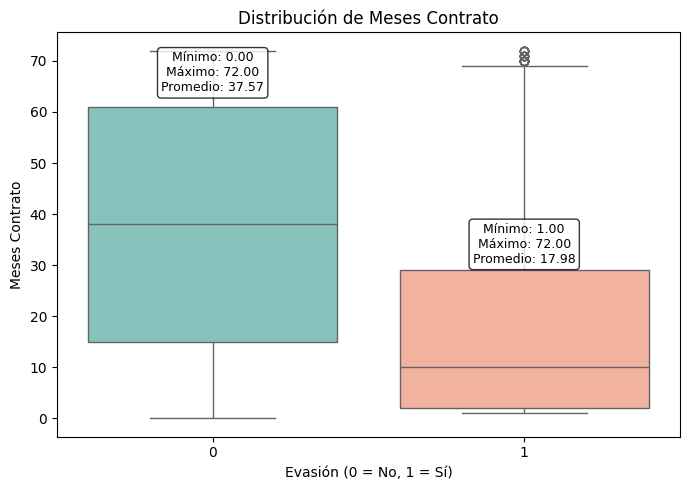

/tmp/ipython-input-4261260096.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='churn', y=col, data=datos_normalizados, palette={'0':'#80CBC4', '1':'#FFAB91'})


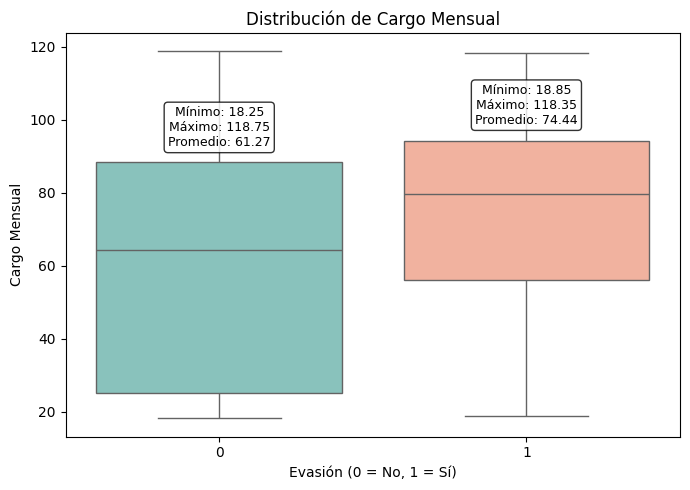

/tmp/ipython-input-4261260096.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='churn', y=col, data=datos_normalizados, palette={'0':'#80CBC4', '1':'#FFAB91'})


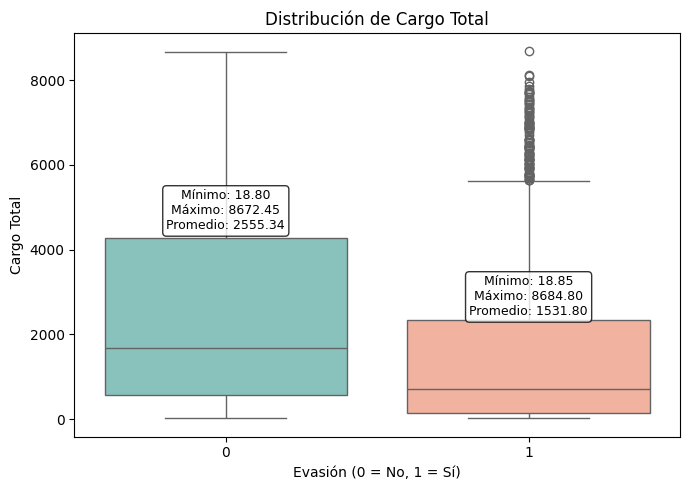

/tmp/ipython-input-4261260096.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='churn', y=col, data=datos_normalizados, palette={'0':'#80CBC4', '1':'#FFAB91'})


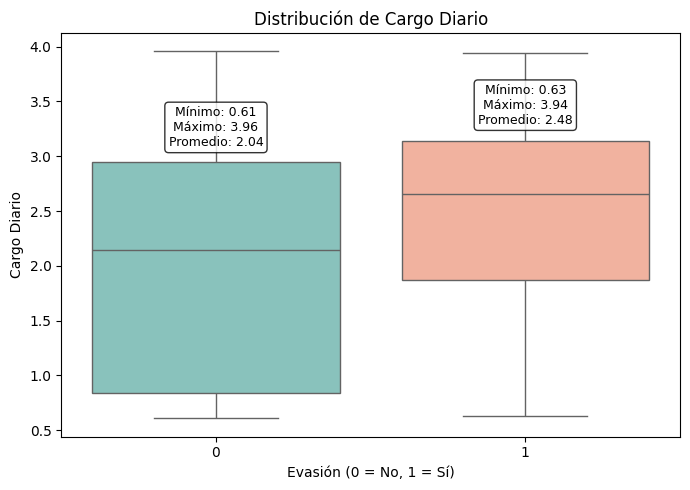

In [81]:
# Listar columnas numéricas

variables_numericas = ['meses_contrato', 'cargo_mensual', 'cargo_total', 'cargo_diario']

for col in variables_numericas:
    plt.figure(figsize=(7, 5))
    ax = sns.boxplot(x='churn', y=col, data=datos_normalizados, palette={'0':'#80CBC4', '1':'#FFAB91'})
    plt.title(f'Distribución de {col.replace("_", " ").title()}')
    plt.ylabel(col.replace("_", " ").title())
    plt.xlabel('Evasión (0 = No, 1 = Sí)')

    # Agdicionar etiquetas

    for grupo in datos_normalizados['churn'].unique():
        datos = datos_normalizados[datos_normalizados['churn'] == grupo][col].dropna()
        minimo = datos.min()
        maximo = datos.max()
        promedio = datos.mean()
        q3 = datos.quantile(0.75)

        # Posición de texto

        x_pos = grupo
        y_pos = q3 + (q3 * 0.05)

        etiqueta = (
            f'Mínimo: {minimo:.2f}\n'
            f'Máximo: {maximo:.2f}\n'
            f'Promedio: {promedio:.2f}'
        )

        ax.text(x = x_pos, y = y_pos, s = etiqueta, ha = 'center', fontsize = 9,
                bbox=dict(facecolor='white', alpha = 0.8, boxstyle='round'))

    plt.tight_layout()
    plt.show()

## Tarea Extra: Análisis de correlación entre variables

In [82]:
# Relación entre la cuenta diaria y la evasión

correlacion_var = datos_normalizados['churn'].corr(datos_normalizados['cargo_diario'])
print(f'La correlación entre la cuenta diaria y la evasión es: {correlacion_var}')

La correlación entre la cuenta diaria y la evasión es: 0.19335642223784713


/tmp/ipython-input-678065302.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='cargo_diario', data=datos_normalizados, palette={'0':'#80CBC4', '1':'#FFAB91'})


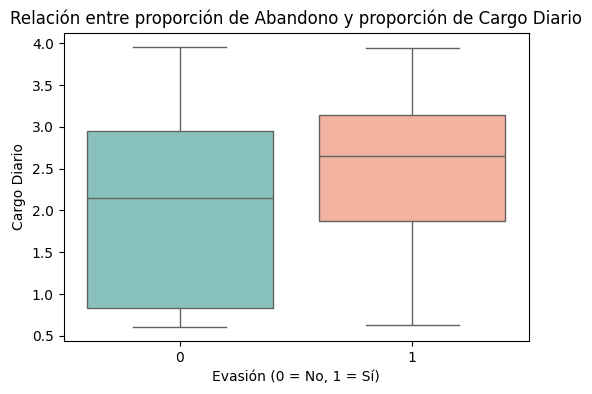

In [84]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='churn', y='cargo_diario', data=datos_normalizados, palette={'0':'#80CBC4', '1':'#FFAB91'})
plt.title('Relación entre proporción de Abandono y proporción de Cargo Diario')
plt.ylabel('Cargo Diario')
plt.xlabel('Evasión (0 = No, 1 = Sí)')

plt.show()

In [85]:
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7043 non-null   object 
 1   churn                   7043 non-null   int64  
 2   genero                  7043 non-null   object 
 3   adulto_mayor            7043 non-null   int64  
 4   pareja                  7043 non-null   int64  
 5   dependientes            7043 non-null   int64  
 6   meses_contrato          7043 non-null   int64  
 7   servicio_internet       7043 non-null   object 
 8   seguridad_en_linea      7043 non-null   object 
 9   respaldo_en_linea       7043 non-null   object 
 10  proteccion_dispositivo  7043 non-null   object 
 11  soporte_tecnico         7043 non-null   object 
 12  tv_streaming            7043 non-null   object 
 13  peliculas_streaming     7043 non-null   object 
 14  tipo_contrato           7043 non-null   objec

In [87]:
variables_numericas = [
    'churn',  # churn
    'meses_contrato',
    'cargo_mensual',
    'cargo_total',
    'cargo_diario',
    'adulto_mayor',        # binaria (0 = no es adulto mayor, 1 = sí)
    'pareja',              # si está codificada como 0 y 1
    'dependientes',        # 0 y 1
    # ...y cualquier otra variable transformada a 0 y 1
]

In [88]:
correlaciones = datos_normalizados[variables_numericas].corr()
print(correlaciones['churn'].sort_values(ascending=False))

churn             1.000000
cargo_mensual     0.193356
cargo_diario      0.193356
adulto_mayor      0.150889
pareja           -0.150448
dependientes     -0.164221
cargo_total      -0.199484
meses_contrato   -0.352229
Name: churn, dtype: float64


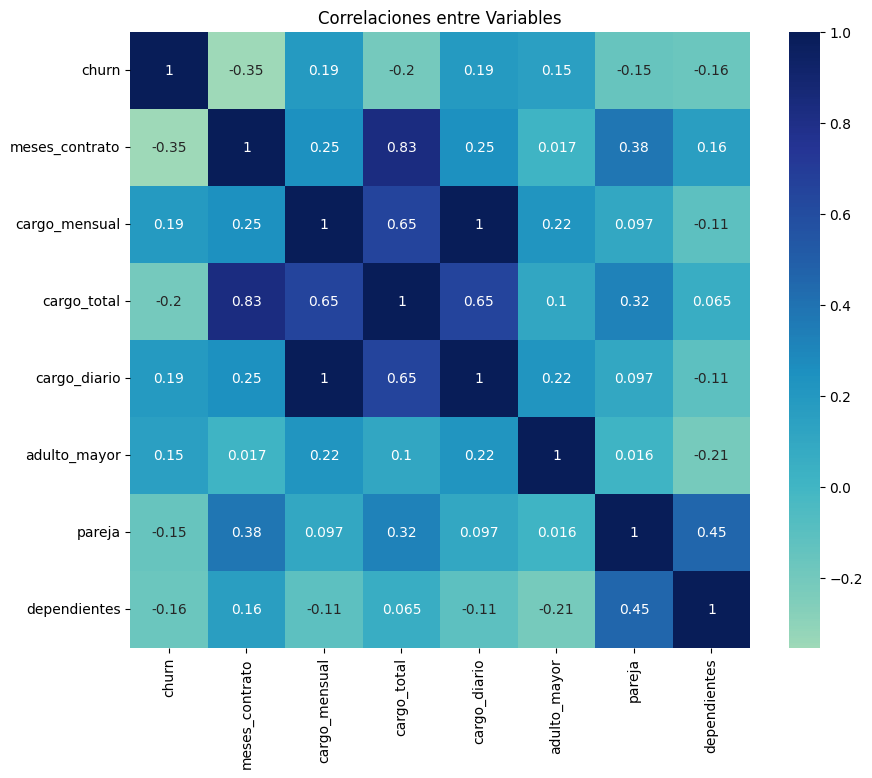

In [90]:
#correlación entre varias variables - mapeo

plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='YlGnBu', center=0)
plt.title('Correlaciones entre Variables')
plt.show()

/tmp/ipython-input-2939249695.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='meses_contrato', data=datos_normalizados, palette={'0':'#80CBC4', '1':'#FFAB91'})


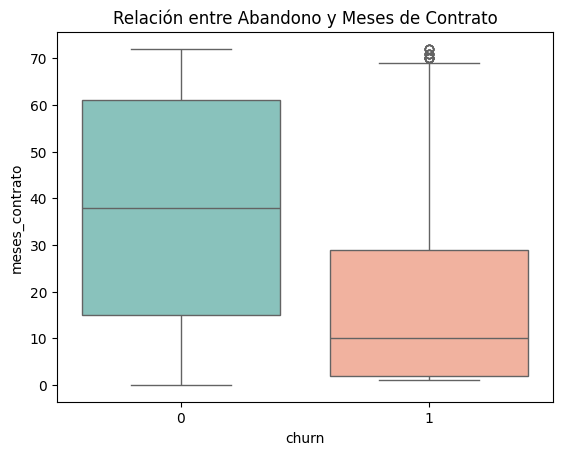

In [91]:
sns.boxplot(x='churn', y='meses_contrato', data=datos_normalizados, palette={'0':'#80CBC4', '1':'#FFAB91'})
plt.title('Relación entre Abandono y Meses de Contrato')

plt.show()

## Informe final

### Introducción

El presente informe se enmarca en el proyecto “Churn de Clientes” (tasa de abandono) de la empresa Telecom X, la cual enfrenta actualmente una crisis debido al elevado número de cancelaciones de sus servicios. El objetivo central de este análisis es identificar los factores que influyen en la deserción de clientes, con el fin de generar información estratégica que facilite el diseño de acciones concretas para mejorar la retención.

Como asistente en el área de análisis de datos, la labor principal ha sido la revisión y ejecución de la importación, depuración y exploración de la información, utilizando Python y bibliotecas especializadas como Pandas, Matplotlib y Seaborn. El proyecto se desarrolló bajo los lineamientos de un proceso ETL (Extracción, Transformación y Carga), lo que permitió garantizar datos limpios, consistentes y estructurados para el análisis.


### Limpieza y Tratamiento de Datos

En primera instancia consistió en garantizar la calidad de los datos antes de iniciar el análisis. Para ello, se llevó a cabo una depuración exhaustiva de la base original en formato JSON, que incluyó las siguientes acciones:

* Eliminación de valores nulos: se identificaron columnas con información ausente (en particular cargo_total) y se descartaron filas incompletas para asegurar la consistencia del dataset.

* Conversión de tipos de datos: varias columnas con respuestas binarias (Yes/No) se encontraban en formato object. Estas fueron transformadas a int64 para permitir su uso en cálculos y visualizaciones. Entre ellas destacan servicio_telefonico y factura_electronica.

* Estandarización de nombres de columnas: se renombraron todas las variables al español con un formato homogéneo (minúsculas y guión bajo), lo que facilitó su interpretación y manipulación.

* Generación de nuevas variables: se incorporaron métricas adicionales como cargo_diario (derivado del cargo_mensual) y cantidad_servicios (suma de servicios contratados por cliente), diseñadas para enriquecer la perspectiva analítica.

Esta etapa fue esencial para estructurar un data confiable y sólido, que permitiera enfocar los siguientes pasos en el descubrimiento de patrones e insights relevantes.


### Análisis Exploratorio de Datos

Una vez depurados los datos, se llevó a cabo un Análisis Exploratorio (EDA) con el objetivo de comprender los factores asociados a la evasión de clientes (churn / Tasa de abandono). A partir de visualizaciones y métricas estadísticas, se identificaron los siguientes hallazgos principales:

* Distribución del churn: cerca de una cuarta parte de los clientes abandona el servicio, lo que evidencia una tasa de deserción significativa.

* Relación con variables categóricas: factores como el tipo de contrato, la contratación de servicios adicionales, la forma de pago y la presencia de dependientes muestran diferencias claras en los niveles de churn. Los gráficos apilados facilitaron la comparación entre categorías.

* Relación con variables numéricas: el análisis mediante boxplots y correlaciones reveló que los clientes con más tiempo de contrato (meses_contrato) y mayor número de servicios (cantidad_servicios) presentan mayor permanencia, mientras que aquellos con cargos mensuales más altos o con pocos servicios contratados son más propensos a abandonar.

* Matriz de correlaciones: se confirmó que meses_contrato tiene la correlación negativa más fuerte con el churn, lo que indica que la antigüedad es un factor clave en la retención.

En conjunto, estos hallazgos permiten perfilizar al cliente con mayor riesgo de abandono y generar hipótesis que orienten el diseño de estrategias efectivas de retención.

### Conclusiones e Insights

El análisis permitió identificar conclusiones relevantes que aportan al entendimiento del contexto actual de Telecom_X:

* Antigüedad con la empresa: Los clientes con mayor tiempo de permanencia (meses_contrato) muestran una marcada tendencia a seguir siendo parte de la compañía. Esto sugiere que implementar estrategias de fidelización en las etapas iniciales podría ser clave para reducir el churn.

* Carga económica: Se observa que un cargo_mensual elevado está asociado, aunque de forma leve, con una mayor probabilidad de abandono. Esto podría deberse a la percepción de alto costo, lo que indica la necesidad de revisar la política de precios o reforzar el valor percibido del servicio.

* Compromiso con el servicio: Los clientes que contratan un mayor número de servicios (cantidad_servicios) presentan tasas más bajas de abandono. Este hallazgo respalda la estrategia de promover paquetes integrados como una vía para fortalecer la retención.

* Factores personales: Los usuarios con pareja o dependientes muestran menor propensión al abandono, posiblemente porque el servicio es compartido en el hogar y, por tanto, se percibe como más necesario.

### Recomendaciones

Estas son algunas recomendaciones:

* Modelo predictivo de churn / tasa de abandono : Desarrollar un modelo que identifique clientes con mayor riesgo de abandono, utilizando las variables más influyentes detectadas en el análisis.

* Campañas de retención focalizadas: Implementar acciones específicas para clientes en riesgo (ej. contratos mensuales o con pocos servicios contratados).

* Mejorar el onboarding: Diseñar experiencias iniciales que fortalezcan la relación con nuevos clientes y fomenten la permanencia a largo plazo.
